In [0]:
#requires the following file to recreate our original gensim model: Wine_word2vec.model
#dataset used: winemag-data_first150k.csv
#dataset to recreate tsne dimensionality reduction: tsne_sampData.csv
#!pip install gensim
#!wget -nc https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz 
import pandas as pd
import numpy as np 
import string
import re
import pprint
import gensim
from gensim.models import KeyedVectors
import nltk
from nltk import word_tokenize, tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec
%matplotlib inline

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thyne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thyne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from gensim.models import KeyedVectors
import nltk
from nltk import word_tokenize, tokenize
nltk.download('punkt')
wineData = pd.read_csv("winemag-data_first150k.csv")
#get list of english stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\thyne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
words = " ".join(wineData['description'])

In [0]:
pattern = r'''(?x)  # set flag to allow verbose regexps
(?:[A-Z]\.)+        # abbreviations, e.g. U.S.A.
|\w+(?:[-']\w+)*    # words with optional internal hyphens
|\$?\d+(?:\.\d+)?   # currency, e.g. $12.80 
|\.\.\.             # elipses
|[.,;"'?()-_`]      # these are separate tokens
'''
tokenized_raw = " ".join(nltk.regexp_tokenize(words, pattern))
tokenized_raw = tokenized_raw.lower()
tokenized_raw = tokenize.sent_tokenize(tokenized_raw)

# Remove punctuations and stop words from the word data
nopunct = []
for sent in tokenized_raw:
    a = [w for w in sent.split() if w not in string.punctuation and w not in stop_words]
    nopunct.append(" ".join(a))

In [0]:
# Word tokenize
tok_corp = [nltk.word_tokenize(sent) for sent in nopunct]

### Creating a list of unique words 
unique_words = list(set([item for sublist in tok_corp for item in sublist]))
len(unique_words)

39337

In [0]:
#own_model = gensim.models.Word2Vec(tok_corp, min_count=1, size=10, window=5, seed = 42)
#own_model.save("Wine_word2vec.model")
own_model = Word2Vec.load("Wine_word2vec.model")

In [0]:
#converts a descrtion into a word vector
#takes the average value of all the word vectors for
#words in the description
def descToVector(descrip):
    output = np.zeros((10,))
    for word in descrip:
        if word in own_model:
            output = output + own_model[word]
        else:
            print(word)
    return(output/len(descrip))

In [0]:
#given a text description, removes punctuation and capitalization
#and tokenizes the text
def makeDesc(rawText):
    pattern = r'''(?x)  # set flag to allow verbose regexps
    (?:[A-Z]\.)+        # abbreviations, e.g. U.S.A.
    |\w+(?:[-']\w+)*    # words with optional internal hyphens
    |\$?\d+(?:\.\d+)?   # currency, e.g. $12.80 
    |\.\.\.             # elipses
    |[.,;"'?()-_`]      # these are separate tokens
    '''
    token_raw = " ".join(nltk.regexp_tokenize(rawText, pattern))
    token_raw = token_raw.lower()
    token_raw = tokenize.sent_tokenize(token_raw)

    # Remove punctuations
    nopunct = ""
    for sent in token_raw:
        a = [w for w in sent.split() if w not in string.punctuation and w not in stop_words]
        nopunct = nopunct + " " + (" ".join(a))
    #nopunct = nopunct.translate(str.maketrans('', '', string.punctuation))
    output = [nltk.word_tokenize(nopunct)]
    return(output[0])

In [0]:
#takes the average of all the word vectors in the description for each wine
#and appends that vector to the specified list
aveVectors2 = []
for i in range(0,len(wineData['description'])):
    description = makeDesc(wineData['description'][i])
    aveVectors2.append(descToVector(description))

c:\users\thyne\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
c:\users\thyne\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


j.c
j.c


In [0]:
wordvector_df = pd.DataFrame(data = aveVectors2, columns = np.array(range(0,10)))
wineData = pd.concat([wineData, wordvector_df], axis = 1)

In [0]:
from scipy import spatial

In [0]:
#finds the most similar wine in a list given a list of descriptive words and a gensim model
#     data: dataframe of wine data
#     descrip: list of strings, where each string is a descriptive word for a wine
#     wineVec: list of word vectors that represent the description of a wine
#     gensim_model: google gensim corpus model
def getSimilarWine(data, descrip, wineVec, gensim_model):
    max = -1
    index = -1
    descripVec = np.zeros((10,))
    for d in descrip:
        descripVec = descripVec + gensim_model[d]
    for i in range(0, len(wineVec)):
        similarity = 1 - spatial.distance.cosine(descripVec, wineVec[i])
        if similarity > max:
            max = similarity
            index = i
    print(wineData['variety'][index])
    print(wineData['winery'][index])    
    print(wineData['description'][index])
    return(wineData.iloc[index,])

In [0]:
winerec = getSimilarWine(wineData, ["dry", "cherry", "chocolate"], aveVectors2, own_model)

c:\users\thyne\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


Syrah
Lawer
Plenty of red currant, chocolate, blackberry jam, cola, pepper and cedar flavors in this dry, tannic wine. Drink up.


In [0]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
wordvector_scaled = min_max_scaler.fit_transform(wordvector_df.values)
wordvector_df_scaled = pd.DataFrame(data = wordvector_scaled, columns = np.array(range(0,10)))

In [0]:
import random
wordvec_sample = wordvector_df_scaled.sample(int(len(wordvector_df_scaled)/25))

In [0]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

0
0.18094597658795075
0.16195461117428236
0.14852391717200353
0.1491132548157557
0.13484491089627249
0.12970859243948882
0.12559060068926114
0.1192941412637726
0.11692996148344549
0.11754707857291201
0.11579034788825815
0.11413559113167511
0.1150789272373038
0.1150685895516301
0.11224734565956405
0.11284808971944826
0.11314101623978644
0.11140423996361354


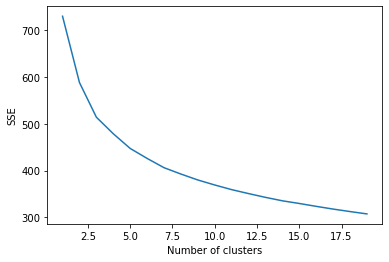

In [0]:
#calculate SSE for each different values of k from 1 to 20
sse = {}
for k in range(1, 20):
    kmeans_full = KMeans(n_clusters=k, random_state = 42).fit(wordvec_sample)
    sse[k] = kmeans_full.inertia_
    if k > 1:
        score = silhouette_score(wordvec_sample, kmeans_full.labels_)
        print(score)
    else:
        print(0)

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()
#choose 3 clusters by the elbow method

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=3, random_state = 42).fit(wordvector_df_scaled)
wineData['Clusters'] = kmeans.labels_

In [0]:
reds = ["Noir", "Grenache", "Merlot", "Sangiovese", "Nebbiolo", "Tempranillo", "Cabernet Sauvignon", "Malbec"]
whites = ["Riesling", "Grigio", "Blanc", "Moscato", "Gewürztraminer", "Sémillon", "Viognier", "Chardonnay"]
subsetRed = wineData[wineData['variety'].str.contains('|'.join(reds))]
subsetRed["variety"] = 0
subsetWhite = wineData[wineData['variety'].str.contains('|'.join(whites))] 
subsetWhite["variety"] = 1
#subsetRose = sample_df[sample_df['variety'].str.contains("Rosé")] 
#subsetRose["variety"] = "Rosé"
redWhite_wines = pd.concat([subsetRed, subsetWhite]) #,subsetRose])


c:\users\thyne\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
c:\users\thyne\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
#perform TSNE dimension reduction on the word2vec representations of each wine
from sklearn.manifold import TSNE

#take a smaller sample of the data, full dataset is too large and running TSNE on it results
#in a memory error
#to avoid running code, read in csv file

sampData = pd.read_csv('tsne_sampData.csv')

#sampData = redWhite_wines.sample(n = 20000, replace = True, random_state = 42)
#sampData = sampData.reset_index()
#samp_scaled = min_max_scaler.fit_transform(sampData[[0,1,2,3,4,5,6,7,8,9]].values)
#tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=400, random_state = 42)
#feature_tsne = tsne.fit_transform(samp_scaled)

In [0]:
#df_tsne = pd.DataFrame(feature_tsne, columns = ['x', 'y'])
#sampData['x'] = df_tsne['x']
#sampData['y'] = df_tsne['y']
#sampData.to_csv("tsne_sampData.csv",index=False)

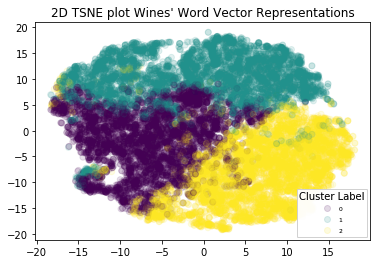

In [0]:
figTSNE, axTSNE = plt.subplots()

scatterTSNE = axTSNE.scatter(sampData['x'], sampData['y'], c=sampData['Clusters'], alpha=0.125)

legend1 = axTSNE.legend(*scatterTSNE.legend_elements(), loc="lower right", title="Cluster Label", prop={'size': 6})
axTSNE.add_artist(legend1)
axTSNE.set_title("2D TSNE plot Wines' Word Vector Representations")
plt.show()

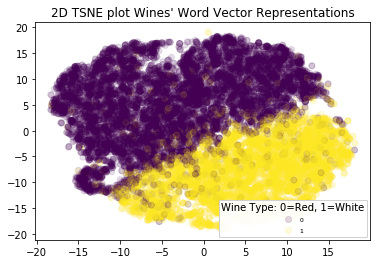

In [0]:
figTSNE, axTSNE = plt.subplots()

scatterTSNE = axTSNE.scatter(sampData['x'], sampData['y'], c=sampData['variety'], alpha=0.125)

legend1 = axTSNE.legend(*scatterTSNE.legend_elements(), loc="lower right", title="Wine Type: 0=Red, 1=White", prop={'size': 6})
axTSNE.add_artist(legend1)
axTSNE.set_title("2D TSNE plot Wines' Word Vector Representations")
plt.show()

In [0]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(2, random_state = 42)
pca.fit(wordvector_df_scaled)
feature_pca = pca.transform(wordvector_df_scaled)

#create dataframe to hold x and y components from PCA dimensionality reduction
df_pca = pd.DataFrame(feature_pca, columns = ['x', 'y'])
wineData['x'] = df_pca['x']
wineData['y'] = df_pca['y']

df_pca['Cluster'] = wineData['Clusters']
df_pca['province'] = wineData['province']
df_pca['points'] = wineData['points']
redWhite_wines['x'] = df_pca['x']
redWhite_wines['y'] = df_pca['y']

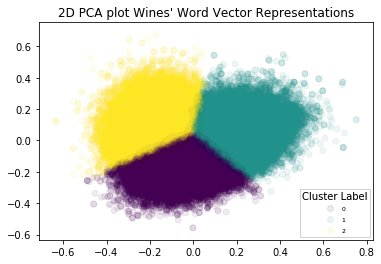

In [0]:
#plot PCA dimension reduced word2vec representations of wines, colored by their
#k-mean cluster label
fig, ax = plt.subplots()

scatter = ax.scatter(df_pca['x'], df_pca['y'], c=df_pca['Cluster'], alpha=0.075)

legend1 = ax.legend(*scatter.legend_elements(), loc="lower right", title="Cluster Label", prop={'size': 6})
ax.add_artist(legend1)
ax.set_title("2D PCA plot Wines' Word Vector Representations")
plt.show()

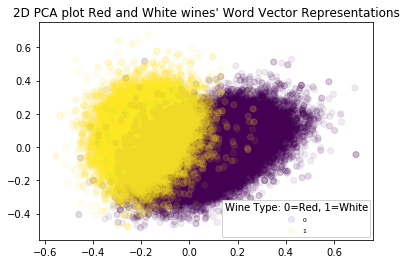

In [0]:
#plot PCA dimension reduced word2vec representations of wines, colored by whether or not the wine was a
#red or a white wine
fig, ax = plt.subplots()

scatter = ax.scatter(redWhite_wines['x'], redWhite_wines['y'], c=redWhite_wines['variety'], alpha=0.075)

legend1 = ax.legend(*scatter.legend_elements(), loc="lower right", title="Wine Type: 0=Red, 1=White", prop={'size': 6})
ax.add_artist(legend1)
ax.set_title("2D PCA plot Red and White wines' Word Vector Representations")
plt.show()

In [0]:
#find the most similar word given the average word vector for wine variety in each cluster
wordvects = wineData[['Clusters',0,1,2,3,4,5,6,7,8,9]]

words = []
for row in wordvects.iterrows():
    words.append(own_model.similar_by_vector(np.asarray(row[1][1:]), topn=1, restrict_vocab=None)[0][0])
words_df = pd.DataFrame(words, columns = ['word'])
wineData = pd.concat([wineData, words_df], axis = 1)

c:\users\thyne\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  


In [0]:
#want to see what the most common descriptors are for the wines in each cluster

#first group by cluster label and word, get their associated counts, and list the top 5 most common words per cluster
wineWordCounts = wineData.groupby(['Clusters', 'word'], as_index = False).count().sort_values('variety', ascending = False)[['Clusters', 'word', 'Unnamed: 0']]

wineWordCounts.columns = ['Clusters', 'word', 'count']
display(wineWordCounts[wineWordCounts['Clusters'] == 0].head())
display(wineWordCounts[wineWordCounts['Clusters'] == 1].head())
display(wineWordCounts[wineWordCounts['Clusters'] == 2].head())

,Clusters,word,count
255,0,black-currant,2919
1309,0,incomparable,1037
505,0,chêvre,874
634,0,couched,868
447,0,char-barrel,828


,Clusters,word,count
3447,1,supported,3817
3272,1,matched,3719
3106,1,deranges,2959
3012,1,black-cherry,2587
3354,1,primary,2331


,Clusters,word,count
3640,2,butter-cream,3052
3996,2,lifted,2940
3919,2,hinting,1378
3675,2,citrus,1348
4388,2,texture,1033
